In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from SubjectiveLogic import Hyperopinion, HyperopinionInterface
from SubjectiveLogic import Hyperopinion as W
from SubjectiveLogic.BeliefFusion import cumulative_fusion, averaging_fusion, weighted_fusion
from SubjectiveLogic.Trust import trust_discount_2e
from Model import *
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable

In [4]:
NUM_AGENTS = 10
NUM_STEPS = 30

In [5]:
def simulate(initial_configuration: BeliefArray, influence_graph: InfluenceGraph, akv_num_steps=NUM_STEPS, sl_model=NUM_STEPS):
    akv_model = AKVModel(initial_configuration, influence_graph)
    sl_model_cumulative = akv_to_sl(akv_model)
    sl_model_average = akv_to_sl(akv_model)
    sl_model_weighted = akv_to_sl(akv_model)

    akv_model.simulate(akv_num_steps)
    sl_model_cumulative.simulate(sl_model, cumulative_fusion)
    sl_model_average.simulate(sl_model, averaging_fusion)
    sl_model_weighted.simulate(sl_model, weighted_fusion)

    return akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted

# 0.1-Clique

Text(0.5, 1.0, 'SL model\n0.1-clique with uniform\nWeighted fusion')

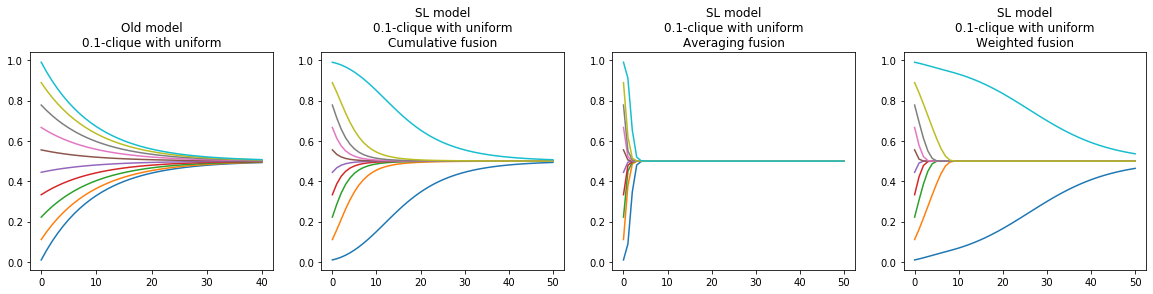

In [6]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 50

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with uniform")
ax[1].set_title("SL model\n0.1-clique with uniform\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with uniform\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with mildly\nWeighted fusion')

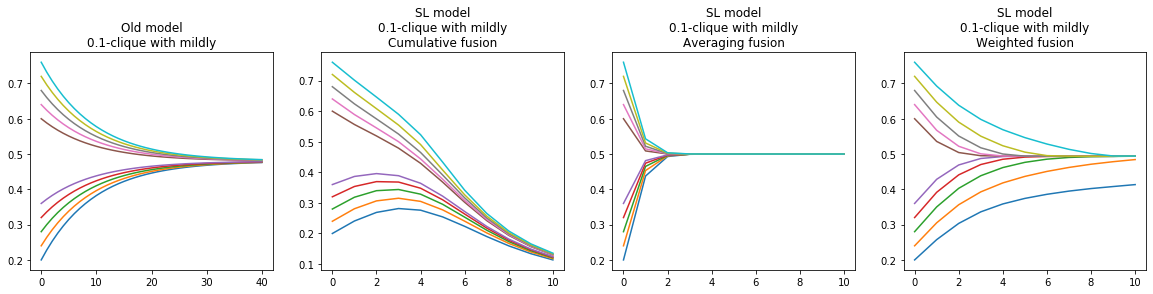

In [7]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with mildly")
ax[1].set_title("SL model\n0.1-clique with mildly\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with mildly\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with extreme\nWeighted fusion')

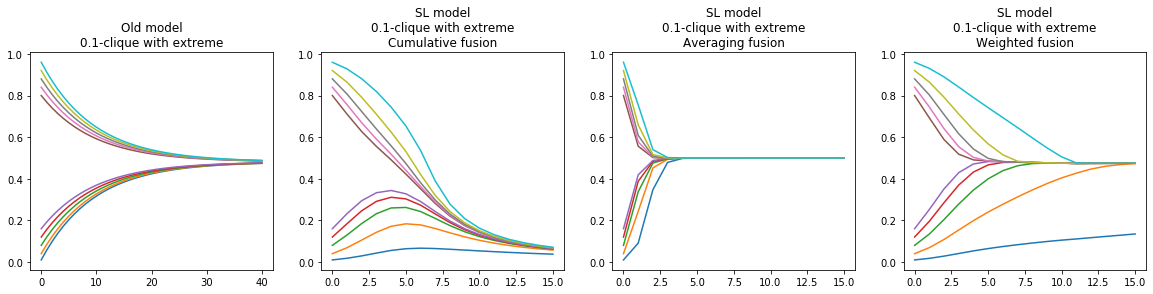

In [8]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 15

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with extreme")
ax[1].set_title("SL model\n0.1-clique with extreme\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with extreme\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.1-clique with tripolar\nWeighted fusion')

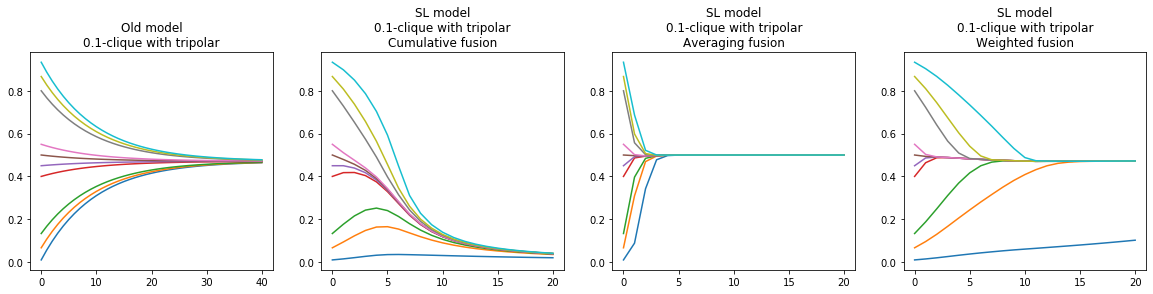

In [9]:
INFLUENCE = 0.1
AKV_NUM_STEPS = 40
SL_STEPS = 20

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.1-clique with tripolar")
ax[1].set_title("SL model\n0.1-clique with tripolar\nCumulative fusion")
ax[2].set_title("SL model\n0.1-clique with tripolar\nAveraging fusion")
ax[3].set_title("SL model\n0.1-clique with tripolar\nWeighted fusion")

# 0.5-Clique

Text(0.5, 1.0, 'SL model\n0.5-clique with uniform\nWeighted fusion')

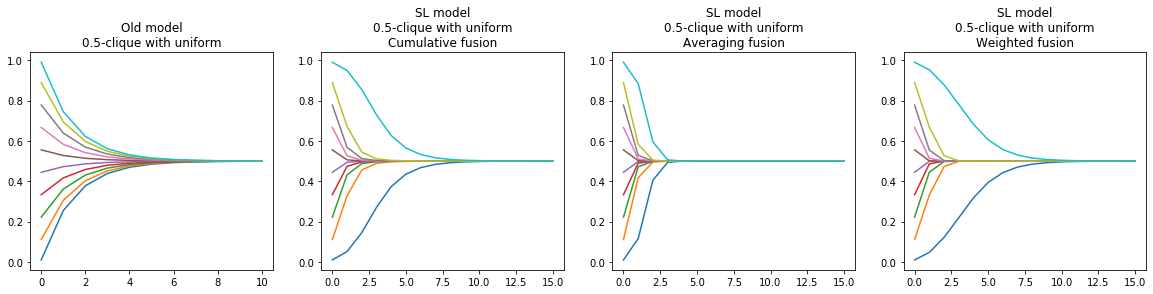

In [10]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 15

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with uniform")
ax[1].set_title("SL model\n0.5-clique with uniform\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with uniform\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with mildly\nWeighted fusion')

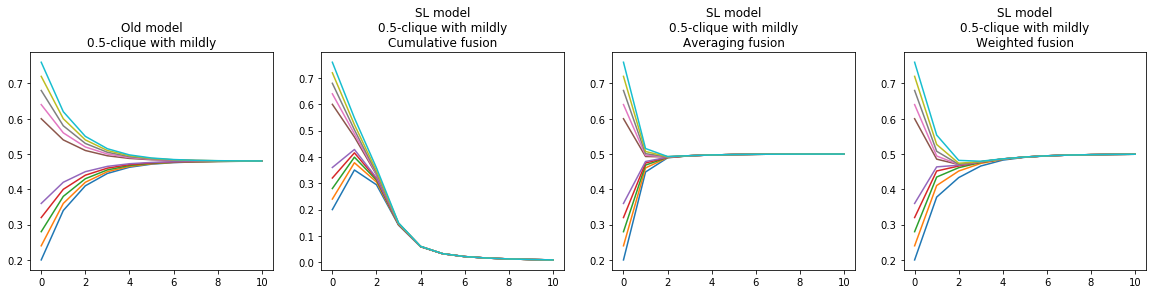

In [11]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with mildly")
ax[1].set_title("SL model\n0.5-clique with mildly\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with mildly\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with extreme\nWeighted fusion')

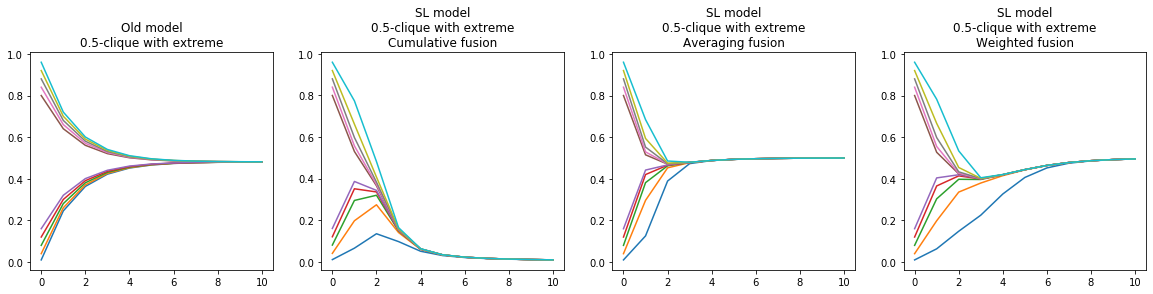

In [12]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 10

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with extreme")
ax[1].set_title("SL model\n0.5-clique with extreme\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with extreme\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\n0.5-clique with tripolar\nWeighted fusion')

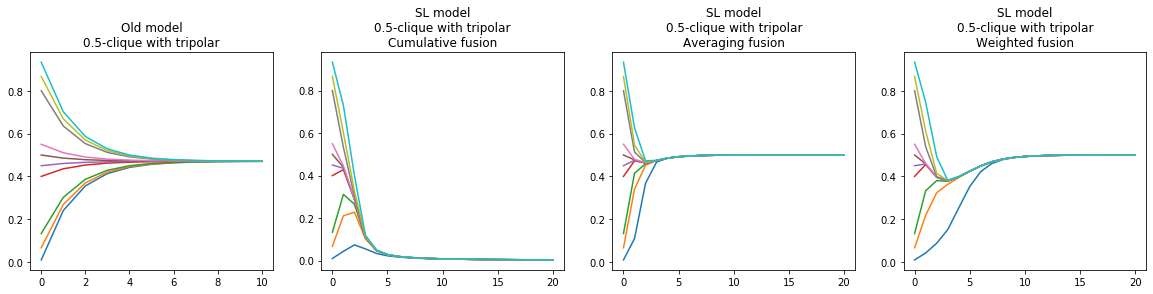

In [13]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 20

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.clique(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\n0.5-clique with tripolar")
ax[1].set_title("SL model\n0.5-clique with tripolar\nCumulative fusion")
ax[2].set_title("SL model\n0.5-clique with tripolar\nAveraging fusion")
ax[3].set_title("SL model\n0.5-clique with tripolar\nWeighted fusion")

## Circular

Text(0.5, 1.0, 'SL model\ncircular with uniform\nWeighted fusion')

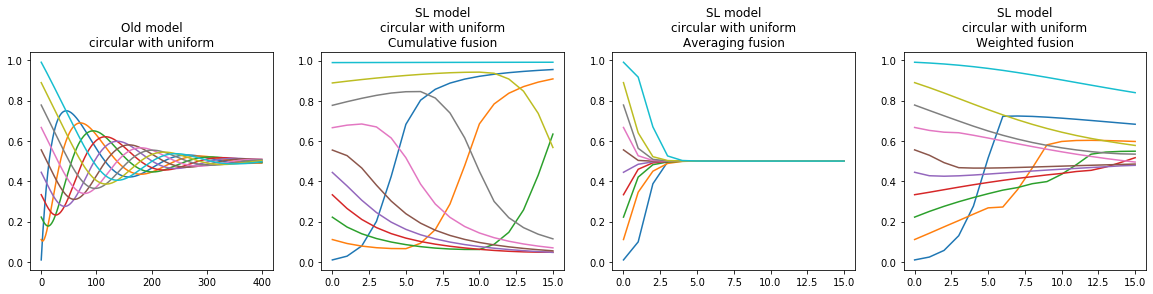

In [14]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 15

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with uniform")
ax[1].set_title("SL model\ncircular with uniform\nCumulative fusion")
ax[2].set_title("SL model\ncircular with uniform\nAveraging fusion")
ax[3].set_title("SL model\ncircular with uniform\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with mildly\nWeighted fusion')

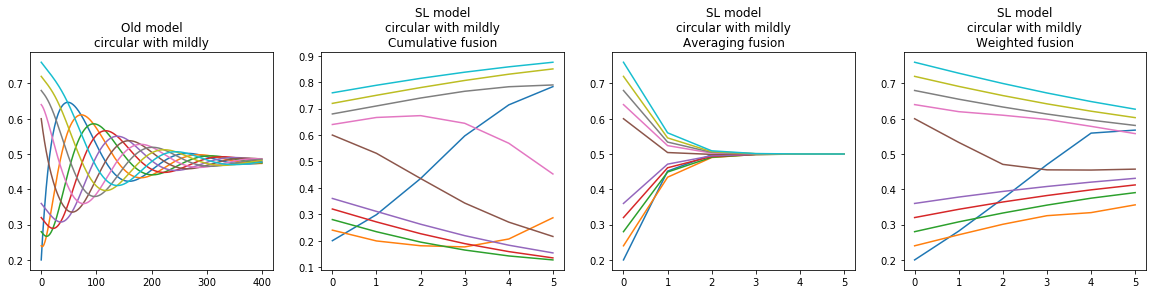

In [15]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.mildly(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with mildly")
ax[1].set_title("SL model\ncircular with mildly\nCumulative fusion")
ax[2].set_title("SL model\ncircular with mildly\nAveraging fusion")
ax[3].set_title("SL model\ncircular with mildly\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with extreme\nWeighted fusion')

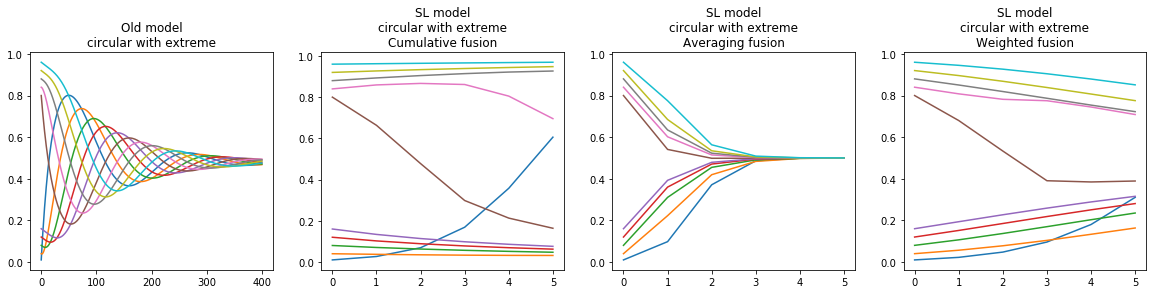

In [16]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.extreme(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with extreme")
ax[1].set_title("SL model\ncircular with extreme\nCumulative fusion")
ax[2].set_title("SL model\ncircular with extreme\nAveraging fusion")
ax[3].set_title("SL model\ncircular with extreme\nWeighted fusion")

Text(0.5, 1.0, 'SL model\ncircular with tripolar\nWeighted fusion')

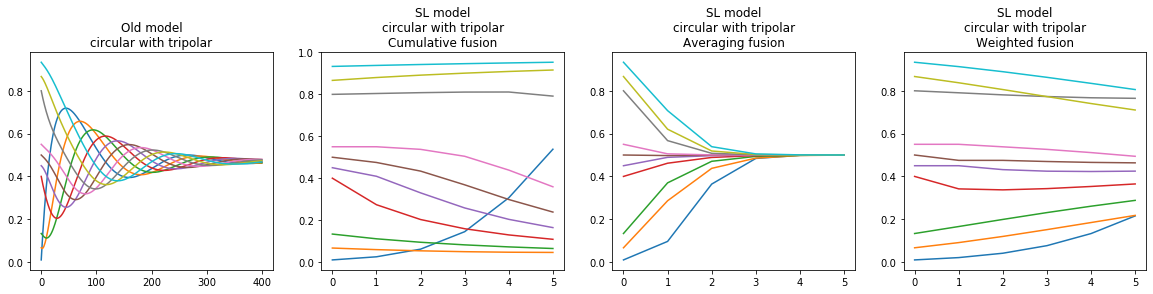

In [17]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 400
SL_STEPS = 5

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.tripolar(NUM_AGENTS), AKVModel.InfluenceGraphs.circular(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\ncircular with tripolar")
ax[1].set_title("SL model\ncircular with tripolar\nCumulative fusion")
ax[2].set_title("SL model\ncircular with tripolar\nAveraging fusion")
ax[3].set_title("SL model\ncircular with tripolar\nWeighted fusion")

## Disconected

Text(0.5, 1.0, 'SL model\nDisconnected with uniform\nWeighted fusion')

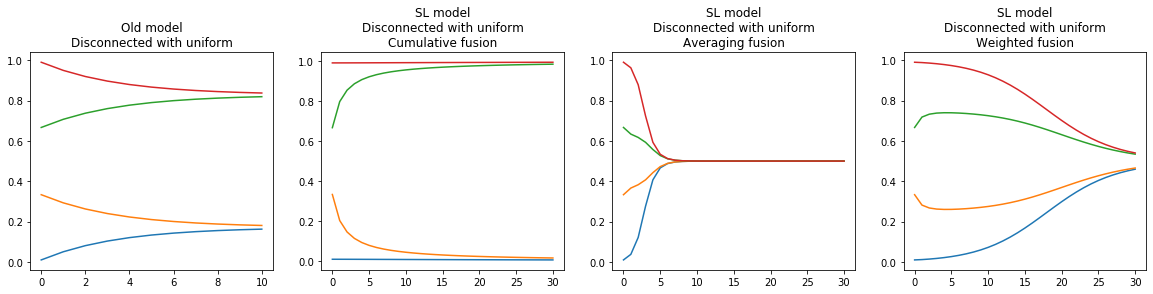

In [18]:
INFLUENCE = 0.5
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 4

akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted = simulate(AKVModel.InitialConfigurations.uniform(NUM_AGENTS), AKVModel.InfluenceGraphs.disconnected(NUM_AGENTS, INFLUENCE), AKV_NUM_STEPS, SL_STEPS)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nDisconnected with uniform")
ax[1].set_title("SL model\nDisconnected with uniform\nCumulative fusion")
ax[2].set_title("SL model\nDisconnected with uniform\nAveraging fusion")
ax[3].set_title("SL model\nDisconnected with uniform\nWeighted fusion")

In [19]:
akv_model.influence_graph

array([[1. , 0.5, 0. , 0. ],
       [0.5, 1. , 0. , 0. ],
       [0. , 0. , 1. , 0.5],
       [0. , 0. , 0.5, 1. ]])

In [20]:
sl_model_weighted.trust_graph

[[None,
  Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  Hyperopinion(2, [0. 1.], [0.5 0.5]),
  Hyperopinion(2, [0. 1.], [0.5 0.5])],
 [Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  None,
  Hyperopinion(2, [0. 1.], [0.5 0.5]),
  Hyperopinion(2, [0. 1.], [0.5 0.5])],
 [Hyperopinion(2, [0. 1.], [0.5 0.5]),
  Hyperopinion(2, [0. 1.], [0.5 0.5]),
  None,
  Hyperopinion(2, [0.5 0.5], [0.5 0.5])],
 [Hyperopinion(2, [0. 1.], [0.5 0.5]),
  Hyperopinion(2, [0. 1.], [0.5 0.5]),
  Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  None]]

In [21]:
sl_model_weighted.states

[[Hyperopinion(2, [0.   0.98], [0.5 0.5]),
  Hyperopinion(2, [0.         0.33333333], [0.5 0.5]),
  Hyperopinion(2, [0.33333333 0.        ], [0.5 0.5]),
  Hyperopinion(2, [0.98 0.  ], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.976694], [0.5 0.5]),
  Hyperopinion(2, [0.       0.436376], [0.5 0.5]),
  Hyperopinion(2, [0.436376 0.      ], [0.5 0.5]),
  Hyperopinion(2, [0.976694 0.      ], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.971676], [0.5 0.5]),
  Hyperopinion(2, [0.       0.465071], [0.5 0.5]),
  Hyperopinion(2, [0.465071 0.      ], [0.5 0.5]),
  Hyperopinion(2, [0.971676 0.      ], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.965205], [0.5 0.5]),
  Hyperopinion(2, [0.       0.475887], [0.5 0.5]),
  Hyperopinion(2, [0.475887 0.      ], [0.5 0.5]),
  Hyperopinion(2, [0.965205 0.      ], [0.5 0.5])],
 [Hyperopinion(2, [0.      0.95711], [0.5 0.5]),
  Hyperopinion(2, [0.      0.47929], [0.5 0.5]),
  Hyperopinion(2, [0.47929 0.     ], [0.5 0.5]),
  Hyperopinion(2, [0.95711 0.     ], [0.5

In [22]:
sl_model = SLModel([Hyperopinion(2, [0.99, 0]), Hyperopinion(2, [0.33, 0])], [[None, Hyperopinion(2, [0.5, 0.5])], [Hyperopinion(2, [0.5, 0.5], None)]])

Text(0.5, 1.0, 'SL model\nuniform\nWeighted fusion')

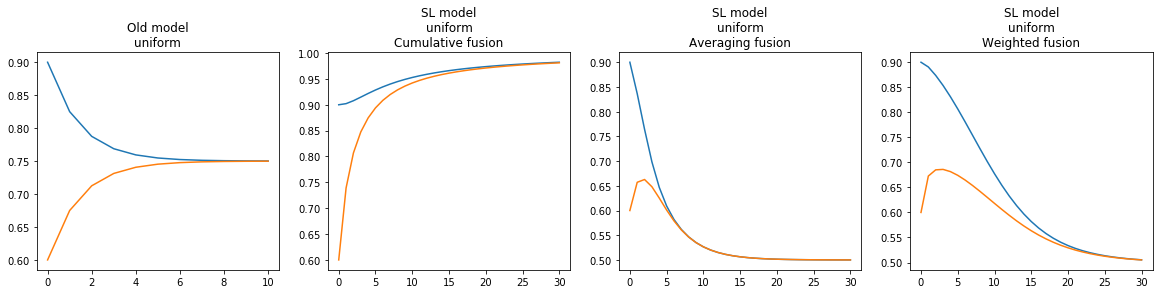

In [25]:
AKV_NUM_STEPS = 10
SL_STEPS = 30
NUM_AGENTS = 2

akv_model = AKVModel([0.9, 0.6], [[1, 0.5], [0.5, 1]])
sl_model_cumulative = akv_to_sl(akv_model)
sl_model_average = akv_to_sl(akv_model)
sl_model_weighted = akv_to_sl(akv_model)

akv_model.simulate(AKV_NUM_STEPS)
sl_model_cumulative.simulate(SL_STEPS, cumulative_fusion)
sl_model_average.simulate(SL_STEPS, averaging_fusion)
sl_model_weighted.simulate(SL_STEPS, weighted_fusion)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    print()
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("Old model\nuniform")
ax[1].set_title("SL model\nuniform\nCumulative fusion")
ax[2].set_title("SL model\nuniform\nAveraging fusion")
ax[3].set_title("SL model\nuniform\nWeighted fusion")

In [24]:
akv_model.states

[[0.9, 0.6],
 array([0.825, 0.675]),
 array([0.7875, 0.7125]),
 array([0.76875, 0.73125]),
 array([0.759375, 0.740625]),
 array([0.7546875, 0.7453125]),
 array([0.75234375, 0.74765625]),
 array([0.75117188, 0.74882812]),
 array([0.75058594, 0.74941406]),
 array([0.75029297, 0.74970703]),
 array([0.75014648, 0.74985352])]